In [113]:
import kagglehub
import pandas as pd
import numpy as np

path = kagglehub.dataset_download(
    "camnugent/predict-nhl-player-salaries/versions/2"
)

df1 = pd.read_csv(path + "/train.csv")
df2 = pd.read_csv(path + "/test.csv")
salary = pd.read_csv(path + "/test_salaries.csv")

df2['Salary'] = salary['Salary'].values
df2 = df2[df1.columns]
df = pd.concat([df1, df2], ignore_index=True)
df.head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000.0,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,...,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,2250000.0,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,...,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,8000000.0,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,...,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,3500000.0,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,...,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,1750000.0,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,...,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27


In [114]:
df['Born'] = pd.to_datetime(df['Born'], format='%y-%m-%d')
df_clean = df.fillna(0)
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = df_clean[col].astype('category').cat.codes
df_clean = df_clean.drop("Born", axis=1)

In [115]:
from sklearn.model_selection import train_test_split

TARGET_NAME = "Salary"
X = df_clean.drop(TARGET_NAME, axis=1)
y = df_clean[TARGET_NAME]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
base_mean_error = mean_absolute_error(y_test, [y_train.mean()]*len(y_test))

print(f"--- Baseline LinearRegreesion (Raw Data) ---")
print(f"MAE (Ошибка в долларах): {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2 Score: {r2:.3f}")
print(f"Для сравнения: если всегда предсказывать среднее, MAE = {base_mean_error:.3f}")

--- Baseline LinearRegreesion (Raw Data) ---
MAE (Ошибка в долларах): 956847.341
RMSE: 1470449.352
R2 Score: 0.609
Для сравнения: если всегда предсказывать среднее, MAE = 1877717.767


Бэйзлайн градиентного бустинга выдал очень приличный результат.

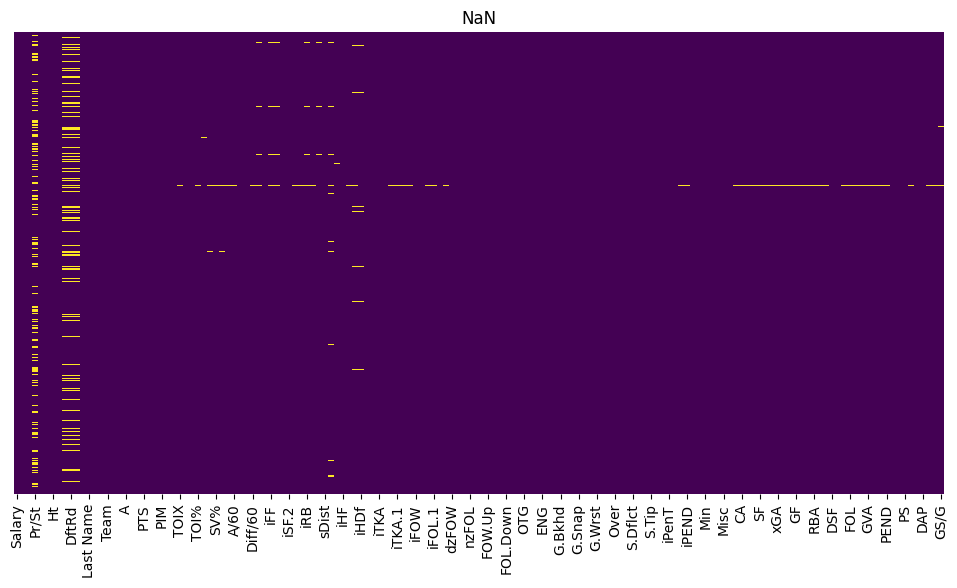

In [159]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
from matplotlib import pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download(
    "camnugent/predict-nhl-player-salaries/versions/2"
)

df1 = pd.read_csv(path + "/train.csv")
df2 = pd.read_csv(path + "/test.csv")
salary = pd.read_csv(path + "/test_salaries.csv")
df2['Salary'] = salary['Salary'].values
df2 = df2[df1.columns]
df = pd.concat([df1, df2], ignore_index=True)

nulls = df.isna().sum().sort_values(ascending=False)
null_pct = (nulls / len(df)).mul(100).round(2)

plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("NaN")
plt.show()

In [160]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,874.0,2.325289e+06,2.298253e+06,575000.00,742500.00,925000.00,3700000.00,14000000.00
Ht,874.0,7.308238e+01,2.105485e+00,66.00,72.00,73.00,75.00,81.00
Wt,874.0,2.008432e+02,1.506008e+01,157.00,190.00,200.00,210.00,265.00
DftYr,749.0,2.008708e+03,4.380158e+00,1990.00,2006.00,2010.00,2012.00,2016.00
DftRd,749.0,2.742323e+00,1.988358e+00,1.00,1.00,2.00,4.00,9.00
...,...,...,...,...,...,...,...,...
Grit,874.0,1.267815e+02,1.016121e+02,0.00,41.00,114.00,190.00,622.00
DAP,874.0,9.215675e+00,7.815029e+00,0.00,4.60,7.60,12.00,61.00
Pace,873.0,1.089439e+02,8.899877e+00,75.00,104.70,109.20,113.90,175.70
GS,873.0,2.187331e+01,2.198638e+01,-4.30,2.60,15.70,35.40,104.70


In [161]:
import pandas as pd
import numpy as np

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

corr_matrix = df[num_cols].corr()

corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['feature_1', 'feature_2', 'correlation']

corr_pairs = corr_pairs[corr_pairs['feature_1'] < corr_pairs['feature_2']]

corr_pairs = corr_pairs.reindex(
    corr_pairs['correlation'].abs().sort_values(ascending=False).index
)

top40 = corr_pairs.head(40)

display(top40)
upper = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_corr = corr_matrix.where(upper)
to_drop = [col for col in upper_corr.columns if any(upper_corr[col] > 0.998)]

df_clean = df.drop(columns=to_drop)

df_clean.head()

,feature_1,feature_2,correlation
4931,iSF.1,iSF.2,0.999996
8267,iFOL,iFOL.1,0.999981
8122,iFOW,iFOW.1,0.999979
6381,iHF,iHF.1,0.999957
2321,TOI,TOIX,0.999952
7398,iBLK,iBLK.1,0.999948
4787,iSF,iSF.2,0.999937
4786,iSF,iSF.1,0.999931
7108,iGVA,iGVA.1,0.999907
7253,iTKA,iTKA.1,0.999843


,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000.0,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,...,1.0,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,2250000.0,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,...,98.0,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,8000000.0,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,...,70.0,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,3500000.0,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,...,22.0,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,1750000.0,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,...,68.0,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27


In [162]:
df_features = df_clean.copy()

df_features['Born'] = pd.to_datetime(df_features['Born'], format='%y-%m-%d')
reference_date = pd.Timestamp('2016-10-01')
df_features['Age'] = (reference_date - df_features['Born']).dt.days / 365.25
df_features["Age_bucket"] = pd.cut(
    df_features["Age"],
    bins=[0, 20, 25, 30, 35, 40, 45],
    labels=["<20", "20-34", "25-29", "30-34", "35-39", "40+"],
)

df_features['Experience'] = reference_date.year - df_features['DftYr']
df_features['PTS_per_GP'] = df_features['PTS'] / df_features['GP'].replace(0, 1)

features_to_drop = ['Born', 'Last Name', 'First Name', 'Nat', 'Pr/St', 'City']
df_features = df_features.drop(features_to_drop, axis=1)
df_features['Match'].value_counts()

Match
0    870
1      4
Name: count, dtype: int64

In [163]:
has_nan = df_features.isnull().any()

columns_with_nan = has_nan[has_nan].index.tolist()

print("Столбцы, содержащие хотя бы один NaN:")
columns_with_nan

Столбцы, содержащие хотя бы один NaN:


['DftYr',
 'DftRd',
 'Ovrl',
 'TOI%',
 'IPP%',
 'SH%',
 'SV%',
 'PDO',
 'F/60',
 'A/60',
 'Diff/60',
 'iCF',
 'iFF',
 'iSF',
 'ixG',
 'iSCF',
 'iRB',
 'iRS',
 'iDS',
 'sDist.1',
 'Pass',
 'iHA',
 'iHDf',
 'BLK%',
 '%FOT',
 'iPENT',
 'iPEND',
 'CF',
 'CA',
 'xGF',
 'xGA',
 'SCF',
 'SCA',
 'GF',
 'GA',
 'RBF',
 'RBA',
 'RSF',
 'RSA',
 'FOW',
 'FOL',
 'HF',
 'HA',
 'GVA',
 'TKA',
 'PENT',
 'PEND',
 'OTOI',
 'Pace',
 'GS',
 'GS/G',
 'Experience']

In [164]:
TARGET_NAME = 'Salary'

X = df_features.drop(TARGET_NAME, axis=1)
y = df_features[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [165]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

cat_branch = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

num_cols = X.select_dtypes(include=["int64", "float64"]).columns

num_branch = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
])

ct = ColumnTransformer(
    transformers=[
        ("cat_proc", cat_branch, cat_cols),
        ("num_proc", num_branch, num_cols),
    ], remainder='drop'
)

In [166]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

full_pipeline = Pipeline([
    ('preprocessor', ct),
    ('model_wrapper', TransformedTargetRegressor(
        regressor=GradientBoostingRegressor(random_state=42),
        func=np.log1p,
        inverse_func=np.expm1
    ))
])

param_grid = {
    'model_wrapper__regressor__n_estimators': [500],
    'model_wrapper__regressor__max_depth': [3, 5, 7],
    'model_wrapper__regressor__learning_rate': [0.005],
    'model_wrapper__regressor__subsample': [0.3, 0.5],

    'model_wrapper__regressor__max_features': [None, 'sqrt', 0.8],
    'model_wrapper__regressor__min_samples_split': [2, 5, 10],
    'model_wrapper__regressor__loss': ['huber']
}

scoring = {
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}
grid = RandomizedSearchCV(
    full_pipeline,
    param_grid,
    cv=3,
    scoring=scoring,
    refit='MAE',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)

y_pred = grid.best_estimator_.predict(X_test)
y_pred_train = grid.best_estimator_.predict(X_train)

mae = mean_absolute_error(y_test, y_pred)
train_mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
base_mean_error = mean_absolute_error(y_test, [y_train.mean()] * len(y_test))

print(f"\n--- Gradient Boosting Regressor ---")
print(f"MAE: {mae:.3f}")
print(f"Train MAE: {train_mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2 Score: {r2:.3f}")
print(f"MAE (predict mean): {base_mean_error:.3f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Лучшие параметры: {'model_wrapper__regressor__subsample': 0.5, 'model_wrapper__regressor__n_estimators': 500, 'model_wrapper__regressor__min_samples_split': 5, 'model_wrapper__regressor__max_features': None, 'model_wrapper__regressor__max_depth': 5, 'model_wrapper__regressor__loss': 'huber', 'model_wrapper__regressor__learning_rate': 0.005}

--- Gradient Boosting Regressor ---
MAE: 883308.542
Train MAE: 575411.334
RMSE: 1531571.069
R2 Score: 0.575
MAE (predict mean): 1877717.767


/var/folders/fy/vtftfll11sb6j735rf_vlly80000gn/T/ipykernel_89850/590331643.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_40_perm, x='importance', y='feature', palette='viridis')


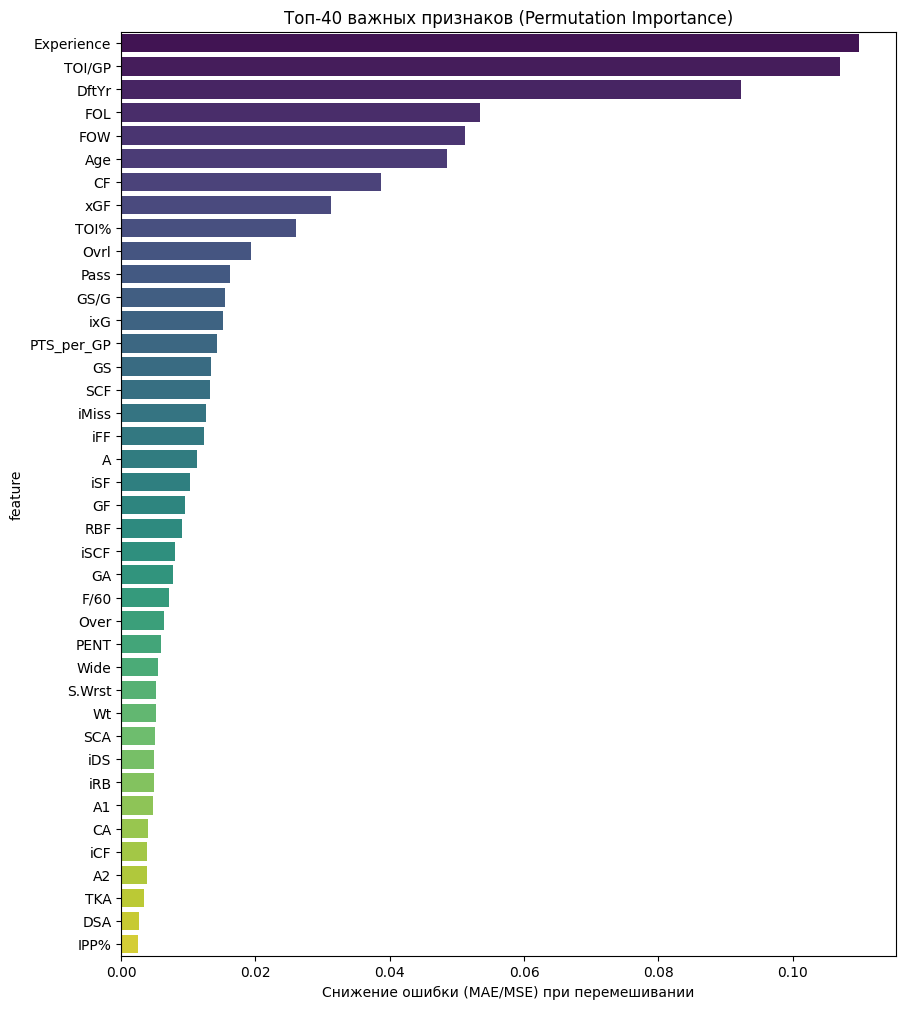

In [167]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance

perm_result = permutation_importance(
    grid.best_estimator_,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

perm_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': perm_result.importances_mean
})

top_40_perm = perm_df.sort_values(by='importance', ascending=False).head(40)

plt.figure(figsize=(10, 12))
sns.barplot(data=top_40_perm, x='importance', y='feature', palette='viridis')
plt.title("Топ-40 важных признаков (Permutation Importance)")
plt.xlabel("Снижение ошибки (MAE/MSE) при перемешивании")
plt.show()

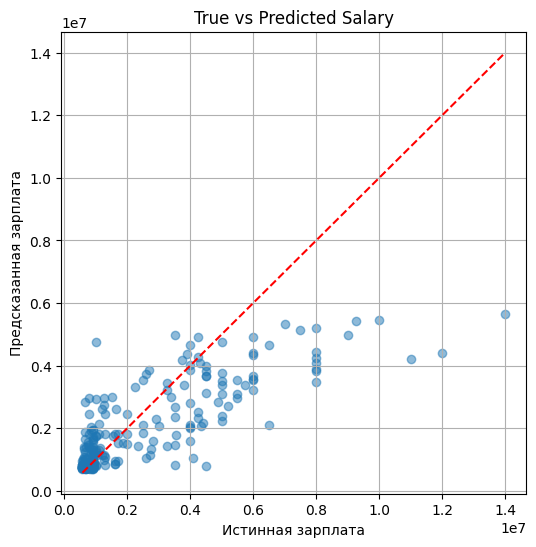

In [168]:
from matplotlib import pyplot as plt


plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Истинная зарплата")
plt.ylabel("Предсказанная зарплата")
plt.title("True vs Predicted Salary")
plt.grid(True)
plt.show()

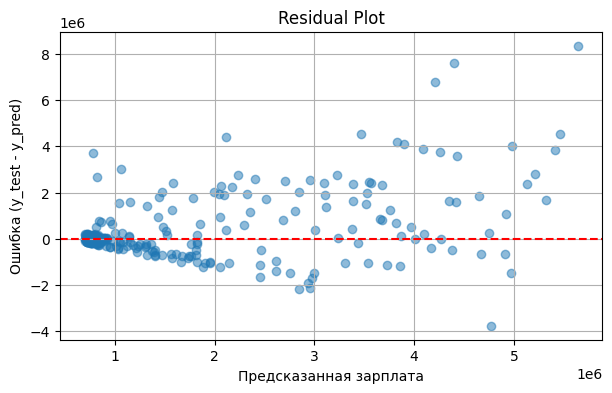

In [169]:
residuals = y_test - y_pred

plt.figure(figsize=(7,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Предсказанная зарплата")
plt.ylabel("Ошибка (y_test - y_pred)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

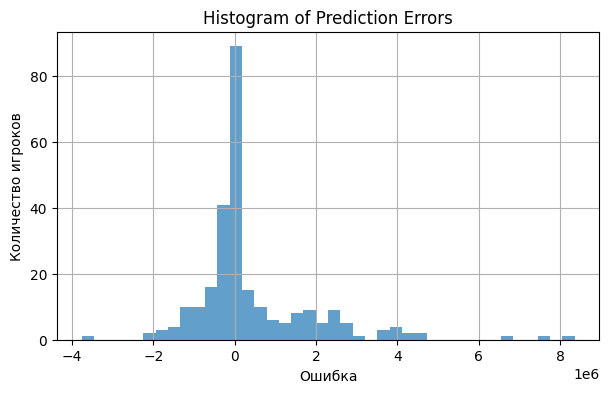

In [170]:
plt.figure(figsize=(7,4))
plt.hist(residuals, bins=40, alpha=0.7)
plt.title("Histogram of Prediction Errors")
plt.xlabel("Ошибка")
plt.ylabel("Количество игроков")
plt.grid(True)
plt.show()

In [171]:
import pandas as pd
import numpy as np

original_float_format = pd.get_option('display.float_format')

pd.set_option('display.float_format', '{:.2f}'.format)

best_model = grid.best_estimator_

y_full_pred = best_model.predict(X)

results_df = pd.DataFrame({
    'True_Salary': y,
    'Predicted_Salary': y_full_pred
})

results_df['Absolute_Error'] = np.abs(results_df['True_Salary'] - results_df['Predicted_Salary'])

test_indices = X_test.index
final_results = pd.merge(
    df[['First Name', 'Last Name']],
    results_df,
    left_index=True,
    right_index=True
)

final_results_sorted = final_results.sort_values(by='Absolute_Error', ascending=False)

print("\n--- Топ-10 игроков с наибольшей ошибкой (Train & Test) ---")
print(final_results_sorted.head(10).to_string())

pd.set_option('display.float_format', original_float_format)


--- Топ-10 игроков с наибольшей ошибкой (Train & Test) ---
    First Name Last Name  True_Salary  Predicted_Salary  Absolute_Error
103    Patrick      Kane  13800000.00        5249296.88      8550703.12
626       Anze   Kopitar  14000000.00        5640671.08      8359328.92
542       Shea     Weber  12000000.00        4397680.29      7602319.71
496   Jonathan     Toews  13800000.00        6347133.10      7452866.90
208       P.K.    Subban  11000000.00        4209401.04      6790598.96
837       Ryan  O'Reilly  11000000.00        4708909.30      6291090.70
817     Steven   Stamkos   9500000.00        3887361.71      5612638.29
145     Sidney    Crosby  10900000.00        5468379.65      5431620.35
260       Alex  Ovechkin  10000000.00        5460981.09      4539018.91
497     Andrew      Ladd   8000000.00        3468062.65      4531937.35


In [172]:
import pandas as pd
final_results['Signed_Error'] = final_results['Predicted_Salary'] - final_results['True_Salary']

overestimated_players = final_results[final_results['Signed_Error'] > 0].copy()

top_overestimated = overestimated_players.sort_values(by='Signed_Error', ascending=False)

print("\n--- Топ-10 игроков с наибольшей переоценкой зарплаты (Predicted > True) ---")

print(top_overestimated[['First Name', 'Last Name',
                         'True_Salary', 'Predicted_Salary', 'Signed_Error']].head(10).to_string())


--- Топ-10 игроков с наибольшей переоценкой зарплаты (Predicted > True) ---
    First Name  Last Name  True_Salary  Predicted_Salary  Signed_Error
532      Radim     Vrbata    1000000.0      4.768102e+06  3.768102e+06
849        Sam     Gagner     650000.0      2.848336e+06  2.198336e+06
412       Mark   Barberio     800000.0      2.953147e+06  2.153147e+06
110       Luke     Schenn    1000000.0      2.933908e+06  1.933908e+06
468         PA  Parenteau    1250000.0      2.970788e+06  1.720788e+06
302        Tom      Pyatt     800000.0      2.450174e+06  1.650174e+06
444       Kyle    Quincey    1250000.0      2.754535e+06  1.504535e+06
5        Brian   Campbell    1500000.0      2.998542e+06  1.498542e+06
326     Martin     Hanzal    3500000.0      4.972546e+06  1.472546e+06
360       Matt    Hunwick    1200000.0      2.612615e+06  1.412615e+06


Ожидания не оправдались, градиентный бустинг оказался хуже для этой задачи, чем HuberLinearRegression. Последняя меньше склонна к переобучению, даёт лучший MAE, да и в целом проще.

In [174]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,
                                  "buntyshah/auto-insurance-claims-data/versions/1",
                                  "insurance_claims.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [175]:
df_clean = df.copy()

TARGET_NAME = "fraud_reported"
df_clean["fraud_reported"] = df_clean["fraud_reported"].map({'Y': 1, 'N': 0})
df_clean["police_report_available"] = df_clean["police_report_available"].map({'YES': 1, 'NO': 0}).fillna(-1)
df_clean["property_damage"] = df_clean["police_report_available"].map({'YES': 1, 'NO': 0}).fillna(-1)

In [176]:
df_clean = df_clean.drop(columns=["_c39"])

In [177]:
date_cols = ["policy_bind_date", "incident_date"]
for c in date_cols:
    df_clean[c] = pd.to_datetime(df_clean[c], errors="coerce")

In [178]:
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = df_clean[col].astype('category').cat.codes
df_clean.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,2,1,1000,1406.91,0,466132,...,2,1.0,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,2006-06-27,1,1,2000,1197.22,5000000,468176,...,0,-1.0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,2000-09-06,2,0,2000,1413.14,5000000,430632,...,3,0.0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,1990-05-25,0,1,2000,1415.74,6000000,608117,...,2,0.0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,2014-06-06,0,2,1000,1583.91,6000000,610706,...,1,0.0,6500,1300,650,4550,0,31,2009,0


In [179]:
from sklearn.model_selection import train_test_split
drop_dates = ["policy_bind_date", "incident_date"]
df_clean = df_clean.drop(drop_dates, axis=1)
X = df_clean.drop(TARGET_NAME, axis=1)
y = df_clean[TARGET_NAME]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [181]:
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

results = {'F1-score': f1, 'ROC-AUC': roc}

print(f"F1-score (класс 1): {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")
print("-" * 30)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("="*50)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

F1-score (класс 1): 0.6452
ROC-AUC: 0.8350
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       226
           1       0.62      0.68      0.65        74

    accuracy                           0.82       300
   macro avg       0.75      0.77      0.76       300
weighted avg       0.82      0.82      0.82       300

Confusion Matrix:
[[195  31]
 [ 24  50]]


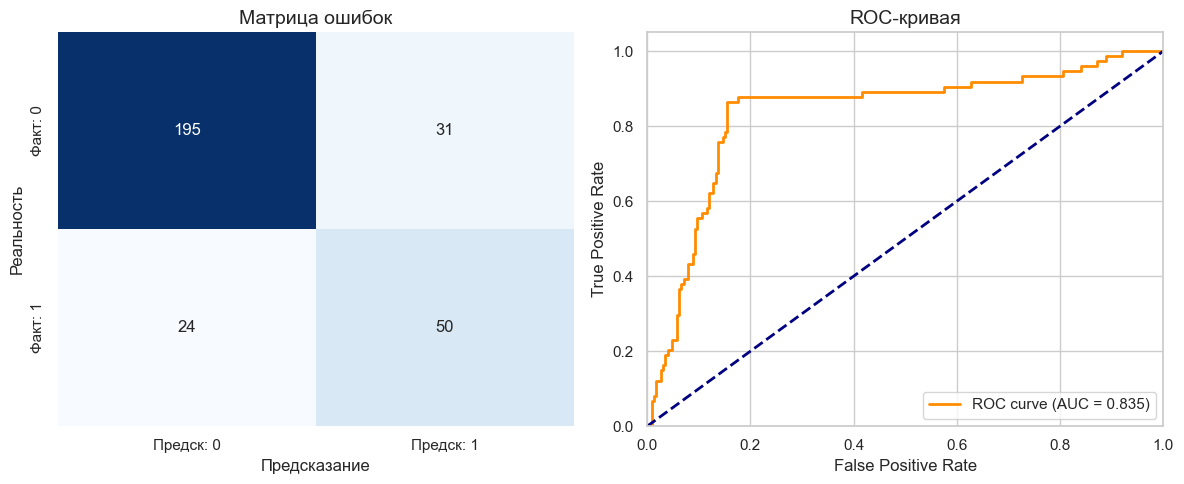

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
def graphics(y_test, y_pred, y_prob):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
                xticklabels=['Предск: 0', 'Предск: 1'],
                yticklabels=['Факт: 0', 'Факт: 1'])
    plt.title("Матрица ошибок", fontsize=14)
    plt.ylabel("Реальность")
    plt.xlabel("Предсказание")

    plt.subplot(1, 2, 2)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая', fontsize=14)
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()
graphics(y_test, y_pred, y_prob)

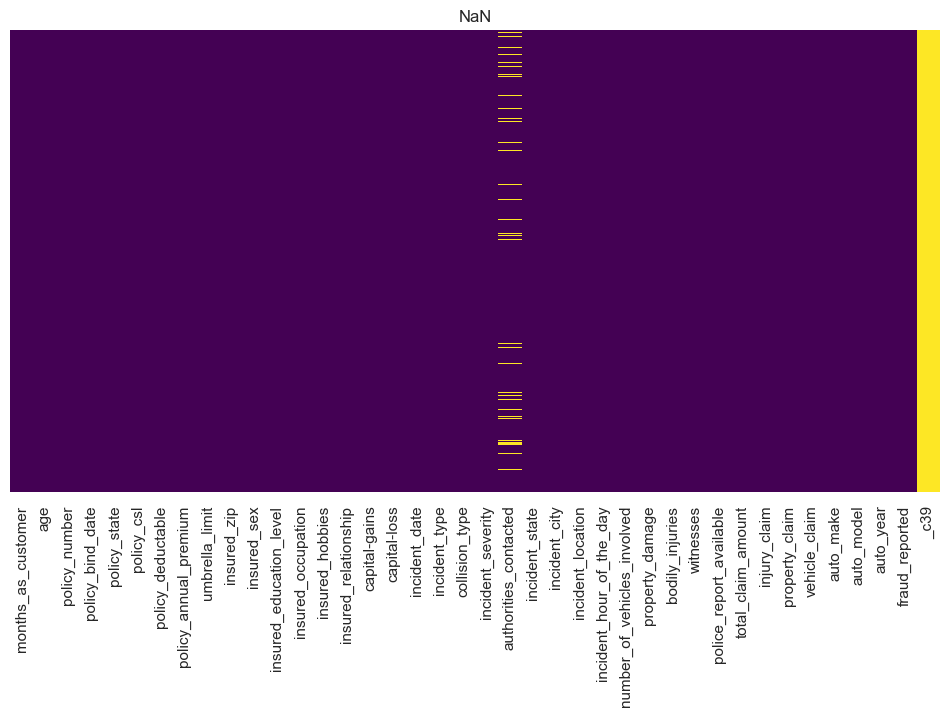

In [183]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,
                                  "buntyshah/auto-insurance-claims-data/versions/1",
                                  "insurance_claims.csv")
df.head()

nulls = df.isna().sum().sort_values(ascending=False)
null_pct = (nulls / len(df)).mul(100).round(2)

plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("NaN")
plt.show()

In [184]:
df_clean = df.copy()
df_clean["fraud_reported"].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

In [185]:
display(df_clean["police_report_available"].unique())
display(df_clean["property_damage"].unique())

array(['YES', '?', 'NO'], dtype=object)

array(['YES', '?', 'NO'], dtype=object)

In [186]:
df_clean = df_clean.drop(columns=["_c39"])

df_clean["authorities_contacted"] = df_clean["authorities_contacted"].fillna("No Contact")

TARGET_NAME = "fraud_reported"
df_clean["fraud_reported"] = df_clean["fraud_reported"].map({'Y': 1, 'N': 0})
df_clean["police_report_available"] = df_clean["police_report_available"].map({'YES': 1, 'NO': 0, '?': -1})
df_clean["property_damage"] = df_clean["property_damage"].map({'YES': 1, 'NO': 0, '?': -1})

dates_cols = ["policy_bind_date", "incident_date"]
for c in date_cols:
    df_clean[c] = pd.to_datetime(df_clean[c])

df_clean

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,-1,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,Accura,RSX,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,-1,87200,17440,8720,61040,Honda,Accord,2006,0
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,-1,108480,18080,18080,72320,Volkswagen,Passat,2015,0
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,1,67500,7500,7500,52500,Suburu,Impreza,1996,0
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,1,46980,5220,5220,36540,Audi,A5,1998,0


In [187]:
num_cols = df_clean.select_dtypes(include=["int64", "float64"]).columns.tolist()
df_clean[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [188]:
import numpy as np

df_pr = df_clean.copy()

median_value = df_pr.loc[df_pr['umbrella_limit'] != -100000, 'umbrella_limit'].median()
df_pr.loc[df_pr['umbrella_limit'] == -100000, 'umbrella_limit'] = median_value

In [189]:
df_features = df_pr.copy()

df_clean["policy_tenure_months"] = ((df_clean["incident_date"] - df_clean["policy_bind_date"]).dt.days / 30).astype(int)

df_features["incident_year"] = df_features["incident_date"].dt.year
df_features["incident_month"] = df_features["incident_date"].dt.month
df_features["incident_dow"] = df_features["incident_date"].dt.dayofweek
df_features["is_weekend"] = df_features["incident_dow"].isin([5, 6]).astype(int)

df_features["injury_ratio"] = df_features["injury_claim"] / (df_features["total_claim_amount"] + 1e-3)
df_features["property_ratio"] = df_features["property_claim"]  / (df_features["total_claim_amount"] + 1e-3)
df_features["vehicle_ratio"] = df_features["vehicle_claim"] / (df_features["total_claim_amount"] + 1e-3)

drop_dates = ["policy_bind_date", "incident_date"]
df_features = df_features.drop(drop_dates, axis=1)

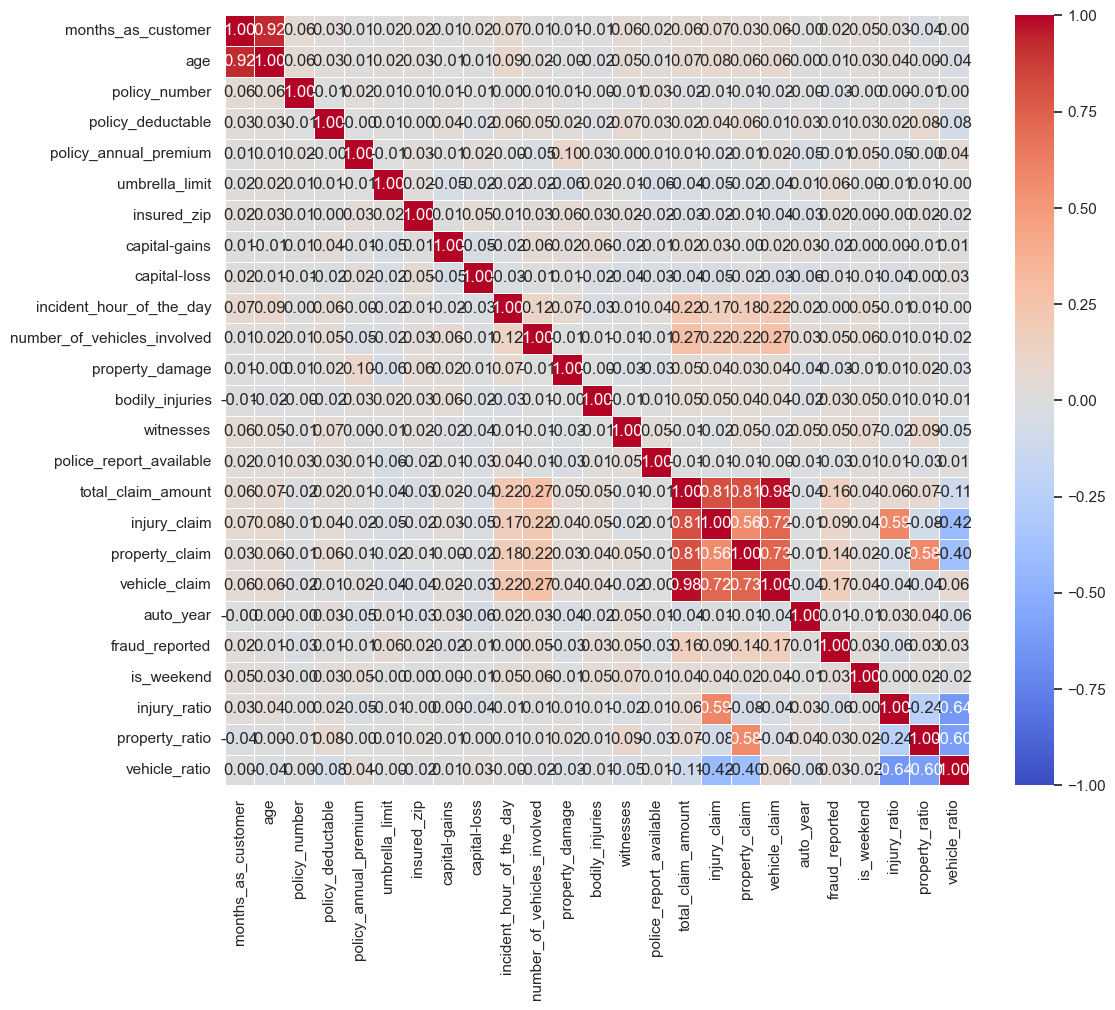

In [190]:
num_cols = df_features.select_dtypes(include=["int64", "float64"]).columns.tolist()

plt.figure(figsize=(12, 10))
correlation_matrix = df_features[num_cols].corr()

sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.5)

plt.show()

In [191]:
from sklearn.model_selection import train_test_split
X = df_features.drop(TARGET_NAME, axis=1)
y = df_features[TARGET_NAME]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [197]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score, classification_report
from xgboost import XGBClassifier

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

categorical_pipe = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown='infrequent_if_exist', sparse_output=False, min_frequency=2))
])

ct = ColumnTransformer([
    ("cat", categorical_pipe, cat_cols)
])

from collections import Counter
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]

model_pipe = Pipeline([
    ('ct', ct),
    ('model', XGBClassifier(
        random_state=42,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight
    ))
])

# Сетка параметров
param_grid = {
    'model__n_estimators': [100, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 1, 5],
    'model__reg_alpha': [0, 0.1, 1],
    'model__reg_lambda': [1, 1.5, 2],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid = GridSearchCV(
    model_pipe,
    param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Лучшие параметры:", grid.best_params_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_prob)

print("-"*30)
print(f"F1-score (класс 1): {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")
print("-"*30)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Лучшие параметры: {'model__colsample_bytree': 1.0, 'model__gamma': 1, 'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__n_estimators': 100, 'model__reg_alpha': 1, 'model__reg_lambda': 2, 'model__subsample': 1.0}
------------------------------
F1-score (класс 1): 0.7361
ROC-AUC: 0.8504
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.89       188
           1       0.65      0.85      0.74        62

    accuracy                           0.85       250
   macro avg       0.80      0.85      0.81       250
weighted avg       0.87      0.85      0.85       250



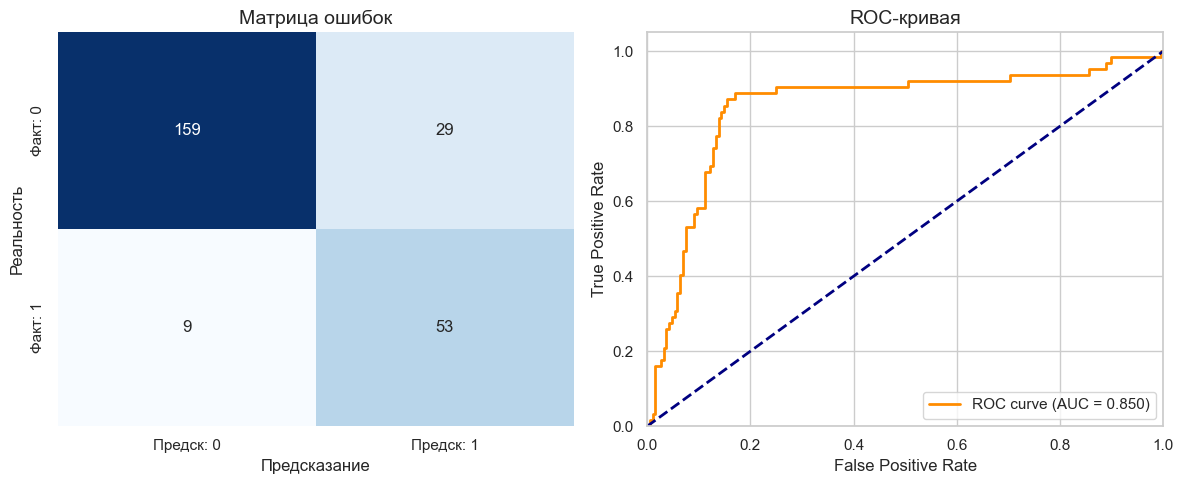

/var/folders/fy/vtftfll11sb6j735rf_vlly80000gn/T/ipykernel_89850/1162972074.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_40_perm, x='importance', y='feature', palette='viridis')


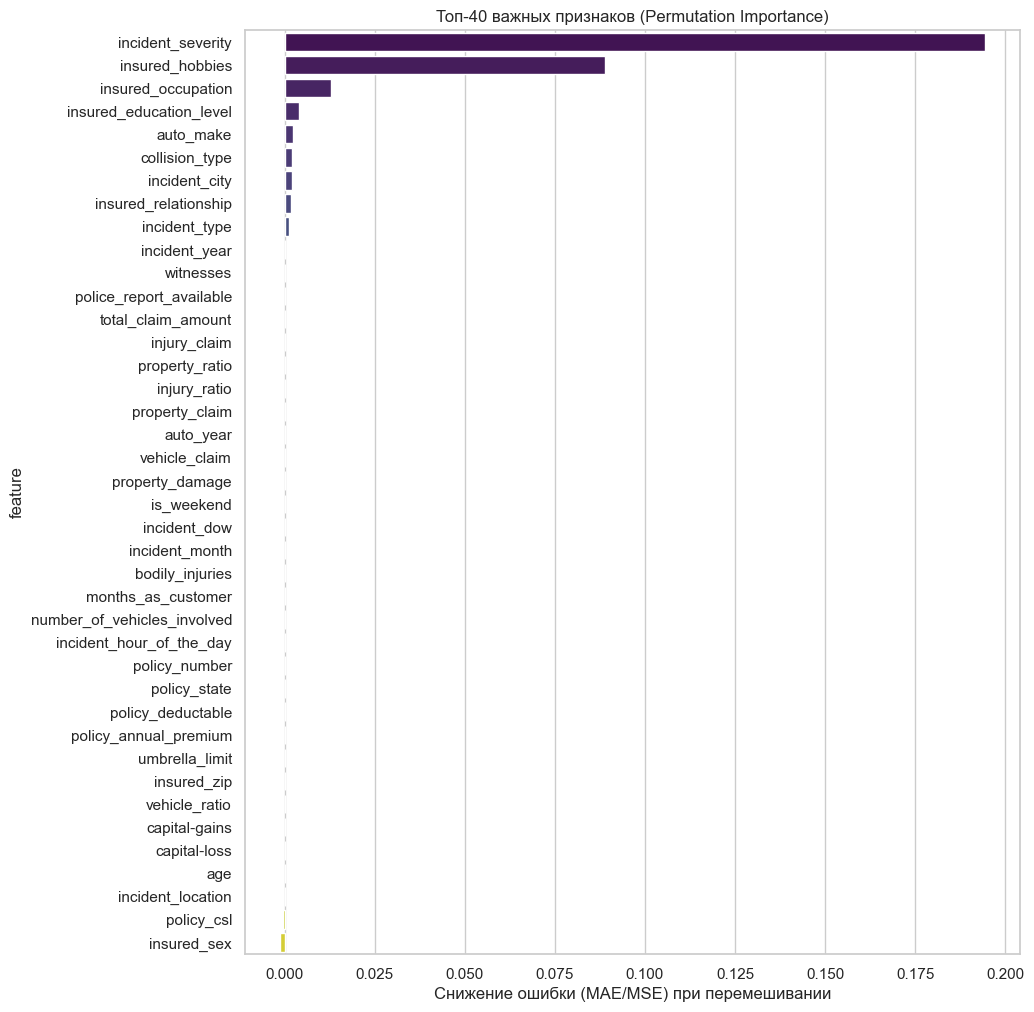

In [198]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
def feature_important(fitted_grid):
    perm_result = permutation_importance(
        fitted_grid.best_estimator_,
        X_test,
        y_test,
        n_repeats=10,
        random_state=42,
        n_jobs=-1
    )

    perm_df = pd.DataFrame({
        'feature': X_test.columns,
        'importance': perm_result.importances_mean
    })

    top_40_perm = perm_df.sort_values(by='importance', ascending=False).head(40)

    plt.figure(figsize=(10, 12))
    sns.barplot(data=top_40_perm, x='importance', y='feature', palette='viridis')
    plt.title("Топ-40 важных признаков (Permutation Importance)")
    plt.xlabel("Снижение ошибки (MAE/MSE) при перемешивании")
    plt.show()

graphics(y_test, y_pred, y_prob)
feature_important(grid)